In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Shape of dataset: (62645, 24)
Nombre de clusters détectés : 9
Nombre de points de bruit : 1535

DBSCAN (scikit-learn) métriques :
Silhouette Score        : 0.1900
Davies-Bouldin Index    : 1.5904
Calinski-Harabasz Index: 5146.8184


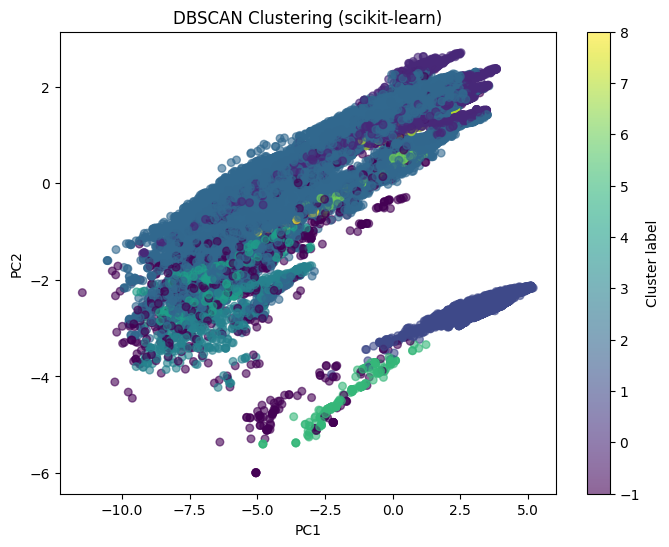

In [2]:
# ==========================================
# 1️⃣ Imports
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# ==========================================
# 2️⃣ Charger les données
# ==========================================
data_dir = "/content/drive/MyDrive/processed_unsupervised"
df = pd.read_csv(f"{data_dir}/X_scaled.csv")
X = df.values  # Dataset déjà normalisé

print(f"Shape of dataset: {X.shape}")

# ==========================================
# 3️⃣ DBSCAN avec scikit-learn
# ==========================================
eps = 2.1983
min_samples = 48

dbscan = DBSCAN(
    eps=eps,
    min_samples=min_samples,
    metric='euclidean'
)

labels_dbscan = dbscan.fit_predict(X)

# ==========================================
# 4️⃣ Résultats
# ==========================================
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = np.sum(labels_dbscan == -1)

print(f"Nombre de clusters détectés : {n_clusters}")
print(f"Nombre de points de bruit : {n_noise}")

# ==========================================
# 5️⃣ Métriques d’évaluation
# ==========================================
if n_clusters > 1:
    silhouette_db = silhouette_score(X, labels_dbscan)
    db_index = davies_bouldin_score(X, labels_dbscan)
    ch_index = calinski_harabasz_score(X, labels_dbscan)

    print("\nDBSCAN (scikit-learn) métriques :")
    print(f"Silhouette Score        : {silhouette_db:.4f}")
    print(f"Davies-Bouldin Index    : {db_index:.4f}")
    print(f"Calinski-Harabasz Index: {ch_index:.4f}")
else:
    print("Impossible de calculer les métriques : moins de 2 clusters.")

# ==========================================
# 6️⃣ Visualisation (PCA)
# ==========================================
if X.shape[1] > 2:
    X_vis = PCA(n_components=2).fit_transform(X)
else:
    X_vis = X

plt.figure(figsize=(8, 6))
plt.scatter(
    X_vis[:, 0],
    X_vis[:, 1],
    c=labels_dbscan,
    cmap='viridis',
    s=30,
    alpha=0.6
)
plt.title("DBSCAN Clustering (scikit-learn)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster label")
plt.show()


CHARGEMENT ET PRÉPARATION DES DONNÉES
Dimensions du dataset : (62645, 24)
Nombre d'échantillons : 62645
Nombre de features : 24

⚠️  Dataset trop grand pour des tests rapides, échantillonnage à 10000 points...
Échantillon utilisé : (10000, 24)

RECHERCHE DES PARAMÈTRES OPTIMAUX
Candidats min_pts testés : [25, 29, 48]


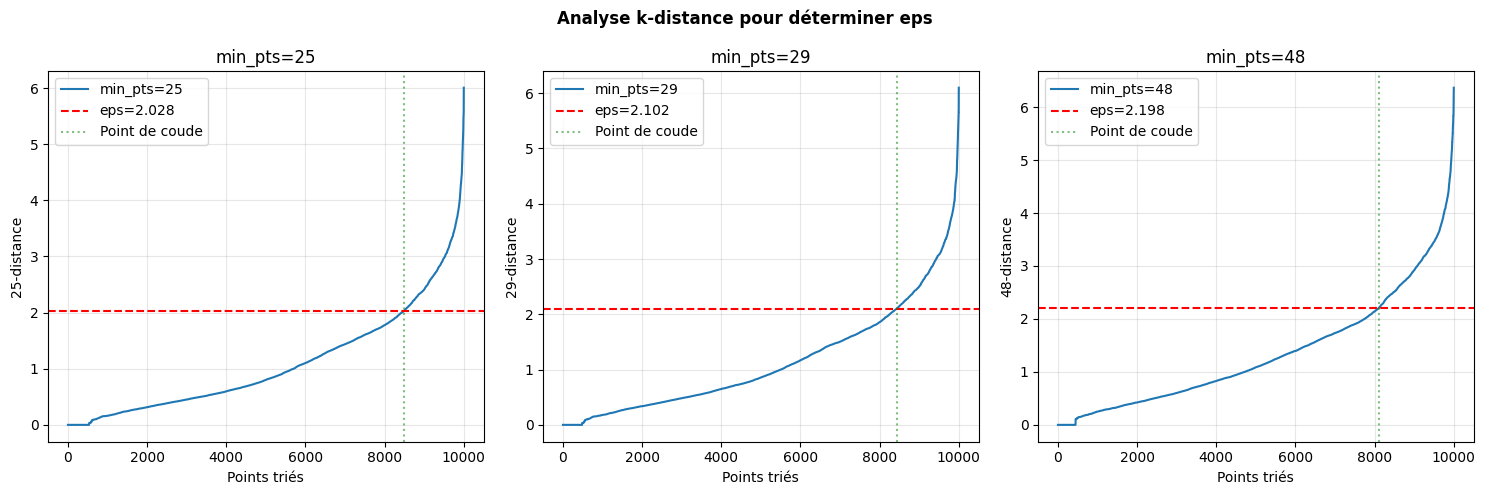


✅ Paramètres optimaux trouvés :
   • eps = 2.1983
   • min_pts = 48

RÉDUCTION EN DIMENSION POUR VISUALISATION
Dimensions après PCA: (10000, 2)

EXÉCUTION DE DBSCAN FROM SCRATCH
Paramètres utilisés: eps=2.1983, min_samples=48
Temps d'exécution: 29.78 secondes
Nombre de clusters trouvés: 6
Points considérés comme bruit: 1294 (12.9%)
Tailles des clusters: [np.int64(4521), np.int64(2217), np.int64(1525), np.int64(134), np.int64(261), np.int64(48)]

EXÉCUTION DE DBSCAN AVEC SCIKIT-LEARN
Paramètres utilisés: eps=2.1983, min_samples=48
Temps d'exécution: 0.69 secondes
Nombre de clusters trouvés: 6
Points considérés comme bruit: 1294 (12.9%)
Tailles des clusters: [np.int64(4521), np.int64(2217), np.int64(1525), np.int64(134), np.int64(261), np.int64(48)]

ÉVALUATION DES RÉSULTATS

📊 TABLEAU COMPARATIF DES PERFORMANCES:
----------------------------------------------------------------------
                       From Scratch Scikit-learn Différence
Nombre clusters                   6         

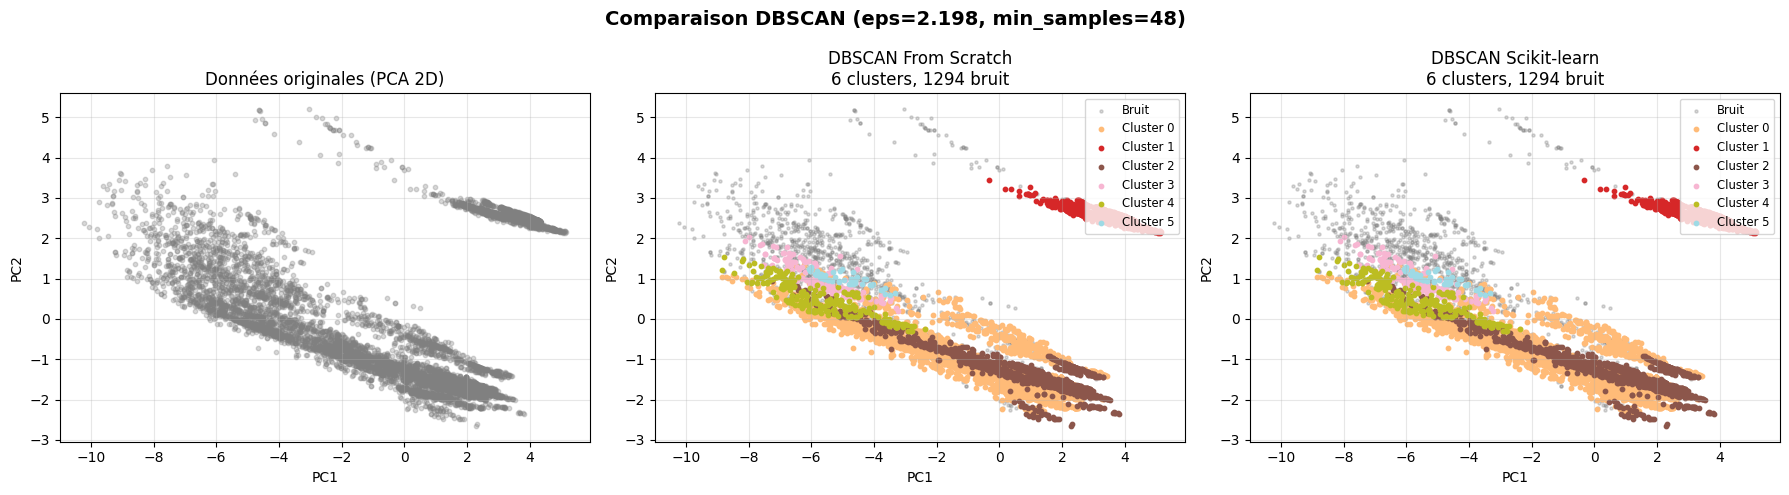

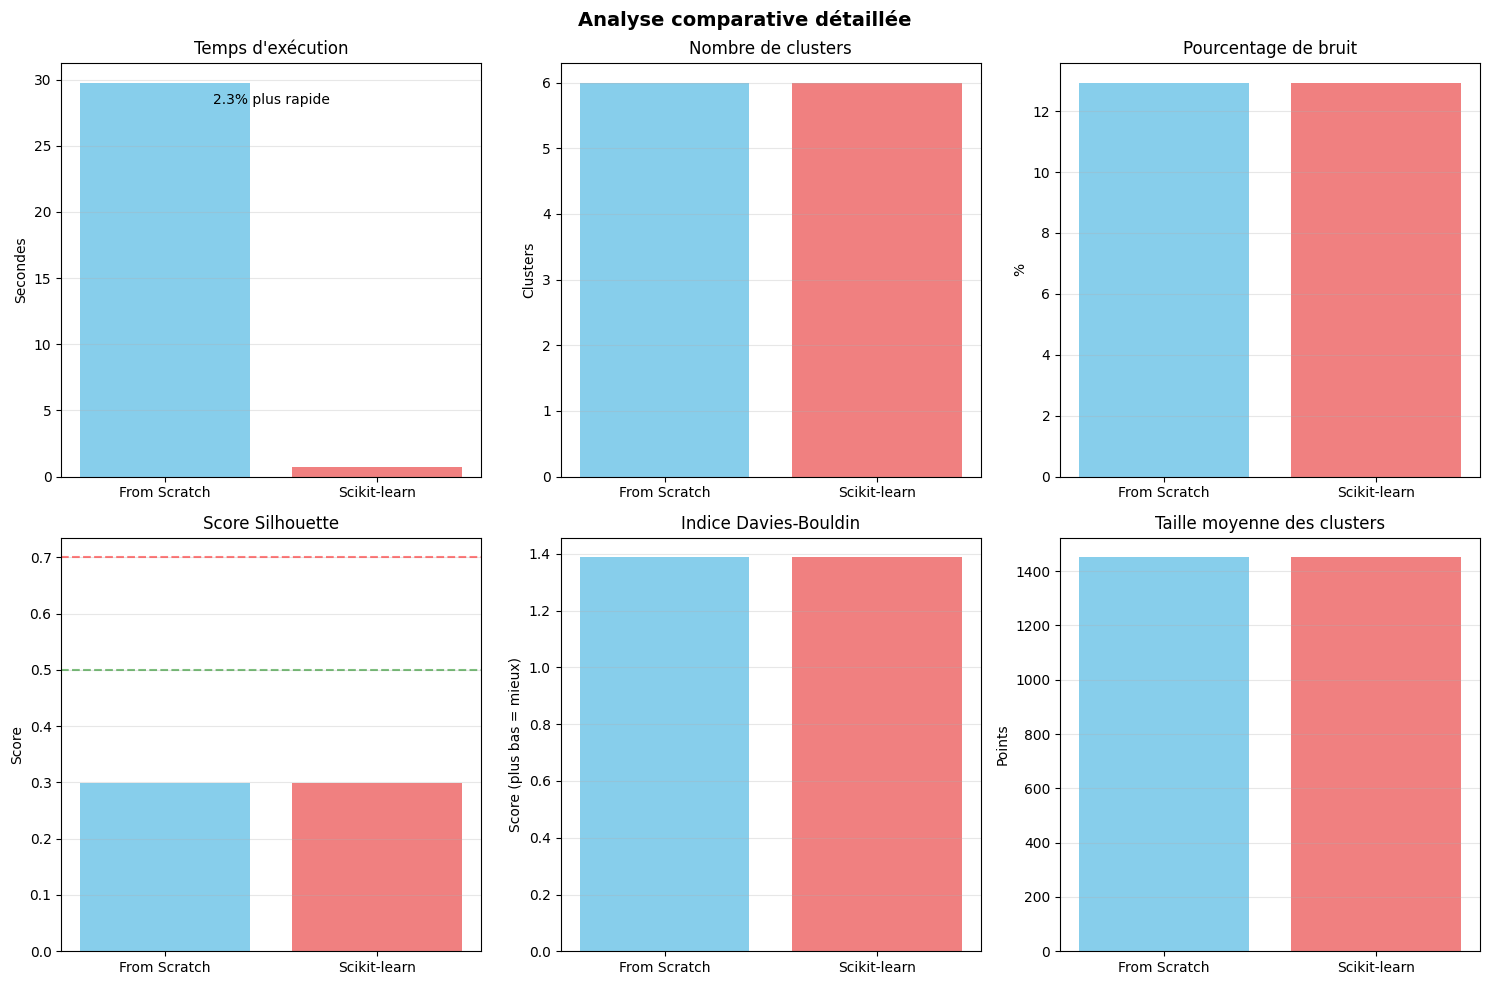


ANALYSE DE SENSIBILITÉ AUX PARAMÈTRES


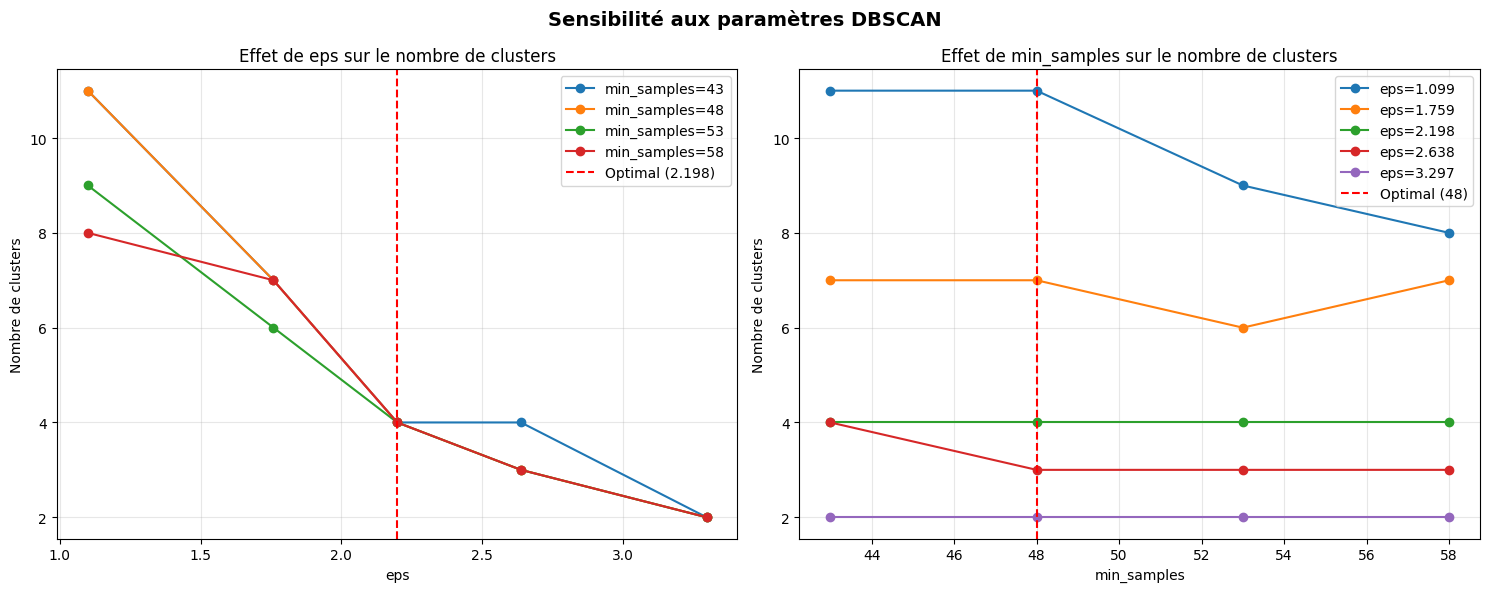


SAUVEGARDE DES RÉSULTATS
✅ Résultats sauvegardés dans : /content/drive/MyDrive/processed_unsupervised/dbscan_comparison_results.csv
✅ Métriques sauvegardées dans : /content/drive/MyDrive/processed_unsupervised/dbscan_metrics_comparison.csv
✅ Paramètres sauvegardés dans : /content/drive/MyDrive/processed_unsupervised/dbscan_parameters.csv

CONCLUSION ET RECOMMANDATIONS

📊 SYNTHÈSE DE LA COMPARAISON :
--------------------------------------------------
1. PERFORMANCE :
   • Scikit-learn est 43.3x plus rapide
   • Temps scratch: 29.78s, sklearn: 0.69s

2. SIMILARITÉ DES RÉSULTATS :
   • Adjusted Rand Index: 1.000
   • Classification identique: 100.0%

3. QUALITÉ DU CLUSTERING :
   • Nombre clusters: scratch=6, sklearn=6
   • % bruit: scratch=12.9%, sklearn=12.9%

4. PARAMÈTRES OPTIMAUX :
   • eps = 2.1983
   • min_samples = 48

5. RECOMMANDATIONS :
   • Pour production: utiliser Scikit-learn (optimisé)
   • Pour apprentissage: utiliser from scratch (pédagogique)
   • Validation: tester pl

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN as SKLearnDBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score
from scipy.spatial.distance import cdist
import time
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. CHARGEMENT ET PRÉPARATION DES DONNÉES
# ============================================================================

print("="*70)
print("CHARGEMENT ET PRÉPARATION DES DONNÉES")
print("="*70)

# Charger les données
data_dir = "/content/drive/MyDrive/processed_unsupervised"
df = pd.read_csv(f"{data_dir}/X_scaled.csv")
X = df.values

print(f"Dimensions du dataset : {X.shape}")
print(f"Nombre d'échantillons : {X.shape[0]}")
print(f"Nombre de features : {X.shape[1]}")

# Échantillonnage si le dataset est trop grand pour les tests
if X.shape[0] > 10000:
    print("\n⚠️  Dataset trop grand pour des tests rapides, échantillonnage à 10000 points...")
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], 10000, replace=False)
    X_sample = X[indices]
    print(f"Échantillon utilisé : {X_sample.shape}")
else:
    X_sample = X

# ============================================================================
# 2. DÉTERMINATION AUTOMATIQUE DES PARAMÈTRES
# ============================================================================

def find_optimal_parameters(X):
    """
    Trouve automatiquement les paramètres optimaux pour DBSCAN
    """
    print("\n" + "="*70)
    print("RECHERCHE DES PARAMÈTRES OPTIMAUX")
    print("="*70)

    dim = X.shape[1]

    # 1. Détermination de min_pts
    min_pts_candidates = [dim + 1, dim + 5, 2 * dim]
    print(f"Candidats min_pts testés : {min_pts_candidates}")

    # 2. Analyse k-distance pour trouver eps
    plt.figure(figsize=(15, 5))

    best_params = {}

    for idx, min_pts in enumerate(min_pts_candidates):
        # Calcul des distances aux k plus proches voisins
        neighbors = NearestNeighbors(n_neighbors=min_pts)
        neighbors_fit = neighbors.fit(X)
        distances, _ = neighbors_fit.kneighbors(X)
        k_distances = np.sort(distances[:, -1])

        # Trouver le point de coude
        n_points = len(k_distances)

        # Méthode du point le plus éloigné de la ligne entre premier et dernier point
        x = np.arange(n_points)
        y = k_distances

        # Coordonnées extrêmes
        x0, y0 = 0, y[0]
        x1, y1 = n_points-1, y[-1]

        # Distance perpendiculaire à la ligne
        distances_perp = []
        for i in range(n_points):
            numerator = abs((y1 - y0) * x[i] - (x1 - x0) * y[i] + x1 * y0 - y1 * x0)
            denominator = np.sqrt((y1 - y0)**2 + (x1 - x0)**2)
            if denominator > 0:
                distances_perp.append(numerator / denominator)

        if distances_perp:
            elbow_idx = np.argmax(distances_perp)
            eps_candidate = y[elbow_idx]

            # Garder le meilleur min_pts basé sur la position du coude
            # On préfère les coudes plus précoces (clusters plus denses)
            if not best_params or elbow_idx < best_params['elbow_idx']:
                best_params = {
                    'min_pts': min_pts,
                    'eps': eps_candidate,
                    'elbow_idx': elbow_idx,
                    'k_distances': k_distances
                }

        # Visualisation
        plt.subplot(1, 3, idx+1)
        plt.plot(k_distances, label=f'min_pts={min_pts}')
        if distances_perp:
            plt.axhline(y=eps_candidate, color='r', linestyle='--',
                       label=f'eps={eps_candidate:.3f}')
            plt.axvline(x=elbow_idx, color='g', linestyle=':',
                       alpha=0.5, label=f'Point de coude')
        plt.xlabel('Points triés')
        plt.ylabel(f'{min_pts}-distance')
        plt.title(f'min_pts={min_pts}')
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.suptitle('Analyse k-distance pour déterminer eps', fontweight='bold')
    plt.tight_layout()
    plt.show()

    print(f"\n✅ Paramètres optimaux trouvés :")
    print(f"   • eps = {best_params['eps']:.4f}")
    print(f"   • min_pts = {best_params['min_pts']}")

    return best_params['eps'], best_params['min_pts']

# Trouver les paramètres optimaux
eps_optimal, min_pts_optimal = find_optimal_parameters(X_sample)

# ============================================================================
# 3. IMPLÉMENTATION DBSCAN FROM SCRATCH
# ============================================================================

class DBSCANFromScratch:
    def __init__(self, eps=0.5, min_samples=5, metric='euclidean'):
        """
        Implémentation de DBSCAN from scratch

        Paramètres:
        - eps: rayon de recherche
        - min_samples: nombre minimum de points pour former un cluster core
        - metric: métrique de distance ('euclidean' ou 'manhattan')
        """
        self.eps = eps
        self.min_samples = min_samples
        self.metric = metric
        self.labels_ = None
        self.core_sample_indices_ = None
        self.components_ = None

    def _compute_distances(self, X):
        """Calcule la matrice des distances selon la métrique choisie"""
        n_samples = X.shape[0]

        if self.metric == 'euclidean':
            # Utiliser cdist pour l'efficacité
            distances = cdist(X, X, 'euclidean')
        elif self.metric == 'manhattan':
            distances = cdist(X, X, 'cityblock')
        else:
            raise ValueError(f"Métrique non supportée: {self.metric}")

        return distances

    def _region_query(self, distances, point_idx):
        """Trouve tous les points dans le rayon eps"""
        return np.where(distances[point_idx] <= self.eps)[0]

    def fit(self, X):
        """Exécute l'algorithme DBSCAN"""
        start_time = time.time()

        n_samples = X.shape[0]
        distances = self._compute_distances(X)

        # Initialisation
        labels = np.full(n_samples, -1, dtype=int)  # -1 = bruit
        visited = np.zeros(n_samples, dtype=bool)
        cluster_id = 0
        core_samples = []

        def expand_cluster(point_idx, neighbors, cluster_id):
            """Étend le cluster à partir d'un point core"""
            labels[point_idx] = cluster_id
            core_samples.append(point_idx)

            i = 0
            while i < len(neighbors):
                nbr_idx = neighbors[i]

                if not visited[nbr_idx]:
                    visited[nbr_idx] = True
                    nbr_neighbors = self._region_query(distances, nbr_idx)

                    if len(nbr_neighbors) >= self.min_samples:
                        # Point core - ajouter ses voisins
                        neighbors = np.concatenate([neighbors, nbr_neighbors])
                        core_samples.append(nbr_idx)

                if labels[nbr_idx] == -1:  # Si c'était du bruit
                    labels[nbr_idx] = cluster_id

                i += 1

        # Parcours principal
        for point_idx in range(n_samples):
            if not visited[point_idx]:
                visited[point_idx] = True

                neighbors = self._region_query(distances, point_idx)

                if len(neighbors) < self.min_samples:
                    # Point bruit
                    labels[point_idx] = -1
                else:
                    # Point core - démarrer un nouveau cluster
                    expand_cluster(point_idx, neighbors, cluster_id)
                    cluster_id += 1

        self.labels_ = labels
        self.core_sample_indices_ = np.array(core_samples)
        self.components_ = X[self.core_sample_indices_] if len(core_samples) > 0 else np.array([])
        self.n_clusters_ = cluster_id
        self.n_noise_ = np.sum(labels == -1)

        # Calcul des tailles de clusters
        self.cluster_sizes_ = []
        for i in range(cluster_id):
            self.cluster_sizes_.append(np.sum(labels == i))

        self.fit_time_ = time.time() - start_time

        return self

    def fit_predict(self, X):
        """Exécute DBSCAN et retourne les labels"""
        self.fit(X)
        return self.labels_

# ============================================================================
# 4. FONCTIONS D'ÉVALUATION SPÉCIFIQUES À DBSCAN
# ============================================================================

def evaluate_dbscan_clustering(X, labels, method_name=""):
    """
    Évaluation complète d'un clustering DBSCAN
    """
    results = {
        'method': method_name,
        'n_clusters': len(np.unique(labels[labels != -1])),
        'n_noise': np.sum(labels == -1),
        'noise_ratio': np.sum(labels == -1) / len(labels)
    }

    # Calcul des tailles de clusters (sans le bruit)
    cluster_ids = np.unique(labels[labels != -1])
    results['cluster_sizes'] = [np.sum(labels == cid) for cid in cluster_ids]

    if len(cluster_ids) > 0:
        results['avg_cluster_size'] = np.mean(results['cluster_sizes'])
        results['std_cluster_size'] = np.std(results['cluster_sizes'])
        results['min_cluster_size'] = np.min(results['cluster_sizes'])
        results['max_cluster_size'] = np.max(results['cluster_sizes'])
    else:
        results['avg_cluster_size'] = 0
        results['std_cluster_size'] = 0
        results['min_cluster_size'] = 0
        results['max_cluster_size'] = 0

    # Calcul des métriques (en excluant le bruit)
    valid_mask = labels != -1
    X_valid = X[valid_mask]
    labels_valid = labels[valid_mask]

    if len(np.unique(labels_valid)) >= 2 and len(X_valid) >= 2:
        try:
            results['silhouette'] = silhouette_score(X_valid, labels_valid)
        except:
            results['silhouette'] = 0

        try:
            results['calinski_harabasz'] = calinski_harabasz_score(X_valid, labels_valid)
        except:
            results['calinski_harabasz'] = 0

        try:
            results['davies_bouldin'] = davies_bouldin_score(X_valid, labels_valid)
        except:
            results['davies_bouldin'] = float('inf')
    else:
        results['silhouette'] = 0
        results['calinski_harabasz'] = 0
        results['davies_bouldin'] = float('inf')

    # Interprétation qualitative
    results['interpretation'] = interpret_dbscan_results(results)

    return results

def interpret_dbscan_results(results):
    """Interprétation textuelle des résultats DBSCAN"""
    interpretations = []

    # Nombre de clusters
    n_clusters = results['n_clusters']
    if n_clusters == 0:
        interpretations.append("Aucun cluster trouvé")
    elif n_clusters == 1:
        interpretations.append("Un seul cluster")
    elif n_clusters <= 3:
        interpretations.append(f"{n_clusters} clusters")
    else:
        interpretations.append(f"{n_clusters} clusters (structure complexe)")

    # Taux de bruit
    noise_ratio = results['noise_ratio']
    if noise_ratio < 0.1:
        interpretations.append("Faible bruit")
    elif noise_ratio < 0.3:
        interpretations.append("Bruit modéré")
    elif noise_ratio < 0.5:
        interpretations.append("Bruit important")
    else:
        interpretations.append("Fort bruit")

    # Qualité silhouette
    silhouette = results.get('silhouette', 0)
    if silhouette > 0.7:
        interpretations.append("Excellente séparation")
    elif silhouette > 0.5:
        interpretations.append("Bonne séparation")
    elif silhouette > 0.25:
        interpretations.append("Séparation modérée")
    else:
        interpretations.append("Faible séparation")

    return ", ".join(interpretations)

def compare_clustering_labels(labels1, labels2):
    """
    Compare deux labellisations de clustering
    """
    # Convertir les labels pour la comparaison (sans bruit)
    valid_mask1 = labels1 != -1
    valid_mask2 = labels2 != -1
    valid_mask = valid_mask1 & valid_mask2

    if np.sum(valid_mask) > 0:
        ari = adjusted_rand_score(labels1[valid_mask], labels2[valid_mask])
        nmi = normalized_mutual_info_score(labels1[valid_mask], labels2[valid_mask])
        homogeneity = homogeneity_score(labels1[valid_mask], labels2[valid_mask])
    else:
        ari = 0
        nmi = 0
        homogeneity = 0

    # Pourcentage de points avec la même classification (bruit vs cluster)
    same_classification = np.mean((labels1 == -1) == (labels2 == -1))

    return {
        'ari': ari,
        'nmi': nmi,
        'homogeneity': homogeneity,
        'same_classification': same_classification
    }

# ============================================================================
# 5. PCA POUR VISUALISATION
# ============================================================================

def pca_for_visualization(X, n_components=2):
    """PCA simplifiée pour visualisation"""
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    components = eigenvectors[:, :n_components]
    X_pca = np.dot(X_centered, components)
    return X_pca

print("\n" + "="*70)
print("RÉDUCTION EN DIMENSION POUR VISUALISATION")
print("="*70)

X_pca = pca_for_visualization(X_sample, n_components=2)
print(f"Dimensions après PCA: {X_pca.shape}")

# ============================================================================
# 6. EXÉCUTION DES DEUX MÉTHODES
# ============================================================================

print("\n" + "="*70)
print("EXÉCUTION DE DBSCAN FROM SCRATCH")
print("="*70)

# DBSCAN from scratch
start_time = time.time()
dbscan_scratch = DBSCANFromScratch(eps=eps_optimal, min_samples=min_pts_optimal)
labels_scratch = dbscan_scratch.fit_predict(X_sample)
scratch_time = time.time() - start_time

print(f"Paramètres utilisés: eps={eps_optimal:.4f}, min_samples={min_pts_optimal}")
print(f"Temps d'exécution: {scratch_time:.2f} secondes")
print(f"Nombre de clusters trouvés: {dbscan_scratch.n_clusters_}")
print(f"Points considérés comme bruit: {dbscan_scratch.n_noise_} ({dbscan_scratch.n_noise_/len(X_sample)*100:.1f}%)")
if dbscan_scratch.n_clusters_ > 0:
    print(f"Tailles des clusters: {dbscan_scratch.cluster_sizes_}")

print("\n" + "="*70)
print("EXÉCUTION DE DBSCAN AVEC SCIKIT-LEARN")
print("="*70)

# DBSCAN scikit-learn
start_time = time.time()
dbscan_sklearn = SKLearnDBSCAN(eps=eps_optimal, min_samples=min_pts_optimal)
labels_sklearn = dbscan_sklearn.fit_predict(X_sample)
sklearn_time = time.time() - start_time

print(f"Paramètres utilisés: eps={eps_optimal:.4f}, min_samples={min_pts_optimal}")
print(f"Temps d'exécution: {sklearn_time:.2f} secondes")
print(f"Nombre de clusters trouvés: {len(np.unique(labels_sklearn[labels_sklearn != -1]))}")
n_noise_sklearn = np.sum(labels_sklearn == -1)
print(f"Points considérés comme bruit: {n_noise_sklearn} ({n_noise_sklearn/len(X_sample)*100:.1f}%)")

# Afficher les tailles de clusters pour sklearn
unique_labels = np.unique(labels_sklearn[labels_sklearn != -1])
if len(unique_labels) > 0:
    cluster_sizes_sklearn = [np.sum(labels_sklearn == label) for label in unique_labels]
    print(f"Tailles des clusters: {cluster_sizes_sklearn}")

# ============================================================================
# 7. ÉVALUATION ET COMPARAISON
# ============================================================================

print("\n" + "="*70)
print("ÉVALUATION DES RÉSULTATS")
print("="*70)

# Évaluation des deux méthodes
results_scratch = evaluate_dbscan_clustering(X_sample, labels_scratch, "DBSCAN From Scratch")
results_sklearn = evaluate_dbscan_clustering(X_sample, labels_sklearn, "DBSCAN Scikit-learn")

# Comparaison directe
comparison_results = compare_clustering_labels(labels_scratch, labels_sklearn)

# Création d'un tableau comparatif
comparison_data = {
    'From Scratch': [
        f"{results_scratch['n_clusters']}",
        f"{results_scratch['n_noise']}",
        f"{results_scratch['noise_ratio']*100:.1f}%",
        f"{results_scratch.get('silhouette', 0):.4f}",
        f"{results_scratch.get('davies_bouldin', 0):.4f}",
        f"{scratch_time:.4f}",
        f"{results_scratch.get('avg_cluster_size', 0):.1f}"
    ],
    'Scikit-learn': [
        f"{results_sklearn['n_clusters']}",
        f"{results_sklearn['n_noise']}",
        f"{results_sklearn['noise_ratio']*100:.1f}%",
        f"{results_sklearn.get('silhouette', 0):.4f}",
        f"{results_sklearn.get('davies_bouldin', 0):.4f}",
        f"{sklearn_time:.4f}",
        f"{results_sklearn.get('avg_cluster_size', 0):.1f}"
    ],
    'Différence': [
        f"{results_scratch['n_clusters'] - results_sklearn['n_clusters']:+d}",
        f"{results_scratch['n_noise'] - results_sklearn['n_noise']:+d}",
        f"{(results_scratch['noise_ratio'] - results_sklearn['noise_ratio'])*100:+.1f}%",
        f"{results_scratch.get('silhouette', 0) - results_sklearn.get('silhouette', 0):+.4f}",
        f"{results_scratch.get('davies_bouldin', 0) - results_sklearn.get('davies_bouldin', 0):+.4f}",
        f"{(scratch_time - sklearn_time)/sklearn_time*100:+.1f}%",
        f"{(results_scratch.get('avg_cluster_size', 0) - results_sklearn.get('avg_cluster_size', 0)):+.1f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data,
    index=['Nombre clusters', 'Points bruit', '% Bruit',
           'Silhouette', 'Davies-Bouldin', 'Temps (s)', 'Taille moyenne cluster'])

print("\n📊 TABLEAU COMPARATIF DES PERFORMANCES:")
print("-" * 70)
print(comparison_df.to_string())

print("\n📈 COMPARAISON DIRECTE DES LABELLISATIONS:")
print("-" * 50)
print(f"Adjusted Rand Index (ARI): {comparison_results['ari']:.4f}")
print(f"Normalized Mutual Info (NMI): {comparison_results['nmi']:.4f}")
print(f"Homogeneity Score: {comparison_results['homogeneity']:.4f}")
print(f"Points avec même classification: {comparison_results['same_classification']*100:.1f}%")

print("\n📋 INTERPRÉTATION:")
print(f"From Scratch: {results_scratch['interpretation']}")
print(f"Scikit-learn: {results_sklearn['interpretation']}")

# ============================================================================
# 8. VISUALISATIONS
# ============================================================================

print("\n" + "="*70)
print("VISUALISATION DES RÉSULTATS")
print("="*70)

def plot_dbscan_comparison(X_pca, labels_scratch, labels_sklearn, eps, min_samples):
    """Visualisation comparative des résultats DBSCAN"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Données originales
    axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c='gray', alpha=0.3, s=10)
    axes[0].set_title('Données originales (PCA 2D)')
    axes[0].set_xlabel('PC1')
    axes[0].set_ylabel('PC2')
    axes[0].grid(True, alpha=0.3)

    # DBSCAN From Scratch
    # Séparer les clusters et le bruit
    unique_labels_scratch = np.unique(labels_scratch)
    colors_scratch = plt.cm.tab20(np.linspace(0, 1, len(unique_labels_scratch)))

    for label, color in zip(unique_labels_scratch, colors_scratch):
        if label == -1:
            # Bruit en gris
            mask = labels_scratch == label
            axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1],
                           c='gray', alpha=0.3, s=5, label='Bruit')
        else:
            mask = labels_scratch == label
            axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1],
                           c=[color], s=10, label=f'Cluster {label}')

    axes[1].set_title(f'DBSCAN From Scratch\n{len(unique_labels_scratch)-1} clusters, {np.sum(labels_scratch == -1)} bruit')
    axes[1].set_xlabel('PC1')
    axes[1].set_ylabel('PC2')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend(loc='upper right', fontsize='small')

    # DBSCAN Scikit-learn
    unique_labels_sklearn = np.unique(labels_sklearn)
    colors_sklearn = plt.cm.tab20(np.linspace(0, 1, len(unique_labels_sklearn)))

    for label, color in zip(unique_labels_sklearn, colors_sklearn):
        if label == -1:
            mask = labels_sklearn == label
            axes[2].scatter(X_pca[mask, 0], X_pca[mask, 1],
                           c='gray', alpha=0.3, s=5, label='Bruit')
        else:
            mask = labels_sklearn == label
            axes[2].scatter(X_pca[mask, 0], X_pca[mask, 1],
                           c=[color], s=10, label=f'Cluster {label}')

    axes[2].set_title(f'DBSCAN Scikit-learn\n{len(unique_labels_sklearn)-1} clusters, {np.sum(labels_sklearn == -1)} bruit')
    axes[2].set_xlabel('PC1')
    axes[2].set_ylabel('PC2')
    axes[2].grid(True, alpha=0.3)
    axes[2].legend(loc='upper right', fontsize='small')

    plt.suptitle(f'Comparaison DBSCAN (eps={eps:.3f}, min_samples={min_samples})',
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Visualisation principale
plot_dbscan_comparison(X_pca, labels_scratch, labels_sklearn, eps_optimal, min_pts_optimal)

# Visualisation des métriques de performance
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Temps d'exécution
axes[0, 0].bar(['From Scratch', 'Scikit-learn'], [scratch_time, sklearn_time],
               color=['skyblue', 'lightcoral'])
axes[0, 0].set_title('Temps d\'exécution')
axes[0, 0].set_ylabel('Secondes')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].text(0.5, 0.9, f'{sklearn_time/scratch_time*100:.1f}% plus rapide',
                transform=axes[0, 0].transAxes, ha='center')

# Nombre de clusters
axes[0, 1].bar(['From Scratch', 'Scikit-learn'],
               [results_scratch['n_clusters'], results_sklearn['n_clusters']],
               color=['skyblue', 'lightcoral'])
axes[0, 1].set_title('Nombre de clusters')
axes[0, 1].set_ylabel('Clusters')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Pourcentage de bruit
axes[0, 2].bar(['From Scratch', 'Scikit-learn'],
               [results_scratch['noise_ratio']*100, results_sklearn['noise_ratio']*100],
               color=['skyblue', 'lightcoral'])
axes[0, 2].set_title('Pourcentage de bruit')
axes[0, 2].set_ylabel('%')
axes[0, 2].grid(True, alpha=0.3, axis='y')

# Score silhouette
axes[1, 0].bar(['From Scratch', 'Scikit-learn'],
               [results_scratch.get('silhouette', 0), results_sklearn.get('silhouette', 0)],
               color=['skyblue', 'lightcoral'])
axes[1, 0].set_title('Score Silhouette')
axes[1, 0].set_ylabel('Score')
axes[1, 0].axhline(y=0.5, color='green', linestyle='--', alpha=0.5)
axes[1, 0].axhline(y=0.7, color='red', linestyle='--', alpha=0.5)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Score Davies-Bouldin
axes[1, 1].bar(['From Scratch', 'Scikit-learn'],
               [results_scratch.get('davies_bouldin', 0), results_sklearn.get('davies_bouldin', 0)],
               color=['skyblue', 'lightcoral'])
axes[1, 1].set_title('Indice Davies-Bouldin')
axes[1, 1].set_ylabel('Score (plus bas = mieux)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Taille moyenne des clusters
axes[1, 2].bar(['From Scratch', 'Scikit-learn'],
               [results_scratch.get('avg_cluster_size', 0), results_sklearn.get('avg_cluster_size', 0)],
               color=['skyblue', 'lightcoral'])
axes[1, 2].set_title('Taille moyenne des clusters')
axes[1, 2].set_ylabel('Points')
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.suptitle('Analyse comparative détaillée', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# 9. ANALYSE DE SENSIBILITÉ AUX PARAMÈTRES
# ============================================================================

def analyze_parameter_sensitivity(X, eps_values=None, min_samples_values=None):
    """Analyse la sensibilité aux paramètres"""
    if eps_values is None:
        eps_values = [eps_optimal * 0.5, eps_optimal * 0.8, eps_optimal,
                     eps_optimal * 1.2, eps_optimal * 1.5]

    if min_samples_values is None:
        min_samples_values = [max(3, min_pts_optimal - 5), min_pts_optimal,
                             min_pts_optimal + 5, min_pts_optimal + 10]

    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            try:
                # Scikit-learn
                dbscan = SKLearnDBSCAN(eps=eps, min_samples=min_samples)
                labels = dbscan.fit_predict(X)

                n_clusters = len(np.unique(labels[labels != -1]))
                n_noise = np.sum(labels == -1)

                results.append({
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise,
                    'noise_ratio': n_noise / len(X)
                })
            except:
                continue

    return pd.DataFrame(results)

print("\n" + "="*70)
print("ANALYSE DE SENSIBILITÉ AUX PARAMÈTRES")
print("="*70)

sensitivity_df = analyze_parameter_sensitivity(X_sample[:5000])  # Sous-échantillon pour vitesse

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Effet de eps
for min_samples in sensitivity_df['min_samples'].unique():
    subset = sensitivity_df[sensitivity_df['min_samples'] == min_samples].sort_values('eps')
    axes[0].plot(subset['eps'], subset['n_clusters'],
                'o-', label=f'min_samples={min_samples}')
axes[0].set_xlabel('eps')
axes[0].set_ylabel('Nombre de clusters')
axes[0].set_title('Effet de eps sur le nombre de clusters')
axes[0].axvline(x=eps_optimal, color='r', linestyle='--', label=f'Optimal ({eps_optimal:.3f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Effet de min_samples
for eps in sensitivity_df['eps'].unique():
    subset = sensitivity_df[sensitivity_df['eps'] == eps].sort_values('min_samples')
    axes[1].plot(subset['min_samples'], subset['n_clusters'],
                'o-', label=f'eps={eps:.3f}')
axes[1].set_xlabel('min_samples')
axes[1].set_ylabel('Nombre de clusters')
axes[1].set_title('Effet de min_samples sur le nombre de clusters')
axes[1].axvline(x=min_pts_optimal, color='r', linestyle='--', label=f'Optimal ({min_pts_optimal})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Sensibilité aux paramètres DBSCAN', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# 10. SAUVEGARDE DES RÉSULTATS
# ============================================================================

print("\n" + "="*70)
print("SAUVEGARDE DES RÉSULTATS")
print("="*70)

# Créer un DataFrame avec les résultats
df_results = pd.DataFrame(X_sample, columns=[f'feature_{i}' for i in range(X_sample.shape[1])])
df_results['cluster_scratch'] = labels_scratch
df_results['cluster_sklearn'] = labels_sklearn
df_results['pca_1'] = X_pca[:, 0]
df_results['pca_2'] = X_pca[:, 1]

# Ajouter une colonne pour l'accord entre les méthodes
df_results['agreement'] = (labels_scratch == labels_sklearn) | \
                          ((labels_scratch == -1) & (labels_sklearn == -1))

# Sauvegarder
output_path = f"{data_dir}/dbscan_comparison_results.csv"
df_results.to_csv(output_path, index=False)
print(f"✅ Résultats sauvegardés dans : {output_path}")

# Sauvegarder les métriques
metrics_df = pd.DataFrame([results_scratch, results_sklearn])
metrics_path = f"{data_dir}/dbscan_metrics_comparison.csv"
metrics_df.to_csv(metrics_path, index=False)
print(f"✅ Métriques sauvegardées dans : {metrics_path}")

# Sauvegarder les paramètres
params_df = pd.DataFrame({
    'parameter': ['eps', 'min_samples', 'sample_size'],
    'value': [eps_optimal, min_pts_optimal, len(X_sample)]
})
params_path = f"{data_dir}/dbscan_parameters.csv"
params_df.to_csv(params_path, index=False)
print(f"✅ Paramètres sauvegardés dans : {params_path}")

# ============================================================================
# 11. CONCLUSION ET RECOMMANDATIONS
# ============================================================================

print("\n" + "="*70)
print("CONCLUSION ET RECOMMANDATIONS")
print("="*70)

print("\n📊 SYNTHÈSE DE LA COMPARAISON :")
print("-" * 50)

# Performance
speedup_factor = scratch_time / sklearn_time if sklearn_time > 0 else float('inf')
print(f"1. PERFORMANCE :")
print(f"   • Scikit-learn est {speedup_factor:.1f}x plus rapide")
print(f"   • Temps scratch: {scratch_time:.2f}s, sklearn: {sklearn_time:.2f}s")

# Similarité
print(f"\n2. SIMILARITÉ DES RÉSULTATS :")
print(f"   • Adjusted Rand Index: {comparison_results['ari']:.3f}")
print(f"   • Classification identique: {comparison_results['same_classification']*100:.1f}%")

# Qualité
print(f"\n3. QUALITÉ DU CLUSTERING :")
print(f"   • Nombre clusters: scratch={results_scratch['n_clusters']}, "
      f"sklearn={results_sklearn['n_clusters']}")
print(f"   • % bruit: scratch={results_scratch['noise_ratio']*100:.1f}%, "
      f"sklearn={results_sklearn['noise_ratio']*100:.1f}%")

print(f"\n4. PARAMÈTRES OPTIMAUX :")
print(f"   • eps = {eps_optimal:.4f}")
print(f"   • min_samples = {min_pts_optimal}")

print(f"\n5. RECOMMANDATIONS :")
print(f"   • Pour production: utiliser Scikit-learn (optimisé)")
print(f"   • Pour apprentissage: utiliser from scratch (pédagogique)")
print(f"   • Validation: tester plusieurs combinaisons de paramètres")

print("\n✅ Analyse DBSCAN comparative terminée avec succès!")

CHARGEMENT ET PRÉPARATION DES DONNÉES
Dimensions du dataset COMPLET : (62645, 24)
Nombre d'échantillons : 62,645
Nombre de features : 24

RECHERCHE DES PARAMÈTRES OPTIMAUX
Utilisation d'un échantillon de 10000 points pour déterminer les paramètres...
Candidats min_pts testés : [25, 29, 48]


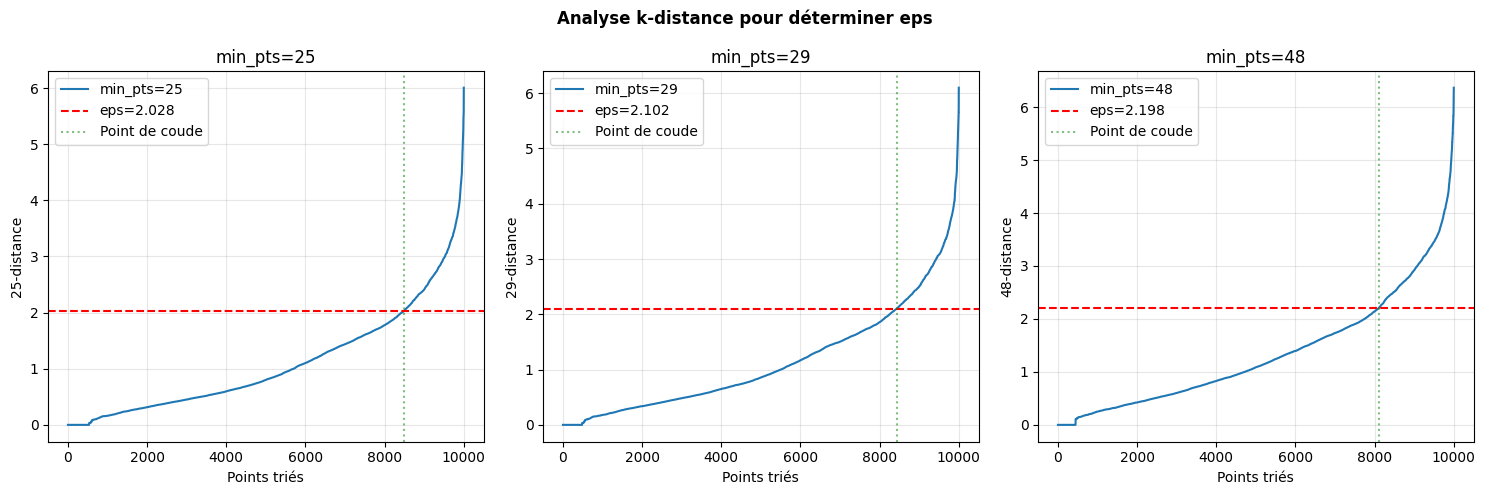


✅ Paramètres optimaux trouvés :
   • eps = 2.1983
   • min_pts = 48

RÉDUCTION EN DIMENSION POUR VISUALISATION
Dimensions après PCA (échantillon de visualisation): (5000, 2)

EXÉCUTION DE DBSCAN FROM SCRATCH SUR DATASET COMPLET

Début DBSCAN sur 62,645 points...
Nombre de batchs : 32
Paramètres : eps=2.1982766325271075, min_samples=48
  Traitement batch 1/32...


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN as SKLearnDBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score
from scipy.spatial.distance import cdist
import time
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. CHARGEMENT ET PRÉPARATION DES DONNÉES
# ============================================================================

print("="*70)
print("CHARGEMENT ET PRÉPARATION DES DONNÉES")
print("="*70)

# Charger les données
data_dir = "/content/drive/MyDrive/processed_unsupervised"
df = pd.read_csv(f"{data_dir}/X_scaled.csv")
X = df.values

print(f"Dimensions du dataset COMPLET : {X.shape}")
print(f"Nombre d'échantillons : {X.shape[0]:,}")
print(f"Nombre de features : {X.shape[1]}")

# Utiliser TOUT le dataset
X_full = X

# ============================================================================
# 2. DÉTERMINATION AUTOMATIQUE DES PARAMÈTRES (sur échantillon représentatif)
# ============================================================================

def find_optimal_parameters(X, sample_size=10000):
    """
    Trouve automatiquement les paramètres optimaux pour DBSCAN
    Utilise un échantillon pour la détermination des paramètres
    """
    print("\n" + "="*70)
    print("RECHERCHE DES PARAMÈTRES OPTIMAUX")
    print("="*70)

    # Échantillonnage pour la recherche de paramètres seulement
    if X.shape[0] > sample_size:
        print(f"Utilisation d'un échantillon de {sample_size} points pour déterminer les paramètres...")
        np.random.seed(42)
        indices = np.random.choice(X.shape[0], sample_size, replace=False)
        X_sample = X[indices]
    else:
        X_sample = X

    dim = X_sample.shape[1]

    # 1. Détermination de min_pts
    min_pts_candidates = [dim + 1, dim + 5, 2 * dim]
    print(f"Candidats min_pts testés : {min_pts_candidates}")

    # 2. Analyse k-distance pour trouver eps
    plt.figure(figsize=(15, 5))

    best_params = {}

    for idx, min_pts in enumerate(min_pts_candidates):
        # Calcul des distances aux k plus proches voisins
        neighbors = NearestNeighbors(n_neighbors=min_pts, algorithm='ball_tree')
        neighbors_fit = neighbors.fit(X_sample)
        distances, _ = neighbors_fit.kneighbors(X_sample)
        k_distances = np.sort(distances[:, -1])

        # Trouver le point de coude
        n_points = len(k_distances)

        # Méthode du point le plus éloigné de la ligne entre premier et dernier point
        x = np.arange(n_points)
        y = k_distances

        # Coordonnées extrêmes
        x0, y0 = 0, y[0]
        x1, y1 = n_points-1, y[-1]

        # Distance perpendiculaire à la ligne
        distances_perp = []
        for i in range(n_points):
            numerator = abs((y1 - y0) * x[i] - (x1 - x0) * y[i] + x1 * y0 - y1 * x0)
            denominator = np.sqrt((y1 - y0)**2 + (x1 - x0)**2)
            if denominator > 0:
                distances_perp.append(numerator / denominator)

        if distances_perp:
            elbow_idx = np.argmax(distances_perp)
            eps_candidate = y[elbow_idx]

            # Garder le meilleur min_pts basé sur la position du coude
            # On préfère les coudes plus précoces (clusters plus denses)
            if not best_params or elbow_idx < best_params['elbow_idx']:
                best_params = {
                    'min_pts': min_pts,
                    'eps': eps_candidate,
                    'elbow_idx': elbow_idx,
                    'k_distances': k_distances
                }

        # Visualisation
        plt.subplot(1, 3, idx+1)
        plt.plot(k_distances, label=f'min_pts={min_pts}')
        if distances_perp:
            plt.axhline(y=eps_candidate, color='r', linestyle='--',
                       label=f'eps={eps_candidate:.3f}')
            plt.axvline(x=elbow_idx, color='g', linestyle=':',
                       alpha=0.5, label=f'Point de coude')
        plt.xlabel('Points triés')
        plt.ylabel(f'{min_pts}-distance')
        plt.title(f'min_pts={min_pts}')
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.suptitle('Analyse k-distance pour déterminer eps', fontweight='bold')
    plt.tight_layout()
    plt.show()

    print(f"\n✅ Paramètres optimaux trouvés :")
    print(f"   • eps = {best_params['eps']:.4f}")
    print(f"   • min_pts = {best_params['min_pts']}")

    return best_params['eps'], best_params['min_pts']

# Trouver les paramètres optimaux sur échantillon représentatif
eps_optimal, min_pts_optimal = find_optimal_parameters(X_full, sample_size=10000)

# ============================================================================
# 3. IMPLÉMENTATION DBSCAN FROM SCRATCH OPTIMISÉE
# ============================================================================

class DBSCANFromScratch:
    def __init__(self, eps=0.5, min_samples=5, metric='euclidean', batch_size=5000):
        """
        Implémentation de DBSCAN from scratch optimisée pour grands datasets

        Paramètres:
        - eps: rayon de recherche
        - min_samples: nombre minimum de points pour former un cluster core
        - metric: métrique de distance ('euclidean' ou 'manhattan')
        - batch_size: taille des batchs pour le calcul des distances
        """
        self.eps = eps
        self.min_samples = min_samples
        self.metric = metric
        self.batch_size = batch_size
        self.labels_ = None
        self.core_sample_indices_ = None
        self.components_ = None

    def _compute_distances_batch(self, X, batch_idx):
        """Calcule les distances par batch pour économiser la mémoire"""
        n_samples = X.shape[0]
        start_idx = batch_idx * self.batch_size
        end_idx = min((batch_idx + 1) * self.batch_size, n_samples)

        batch_points = X[start_idx:end_idx]

        if self.metric == 'euclidean':
            distances = cdist(batch_points, X, 'euclidean')
        elif self.metric == 'manhattan':
            distances = cdist(batch_points, X, 'cityblock')
        else:
            raise ValueError(f"Métrique non supportée: {self.metric}")

        return distances, start_idx, end_idx

    def _region_query(self, distances_batch, point_idx_in_batch):
        """Trouve tous les points dans le rayon eps"""
        return np.where(distances_batch[point_idx_in_batch] <= self.eps)[0]

    def fit(self, X):
        """Exécute l'algorithme DBSCAN optimisé"""
        start_time = time.time()

        n_samples = X.shape[0]
        n_batches = (n_samples + self.batch_size - 1) // self.batch_size

        print(f"\nDébut DBSCAN sur {n_samples:,} points...")
        print(f"Nombre de batchs : {n_batches}")
        print(f"Paramètres : eps={self.eps}, min_samples={self.min_samples}")

        # Initialisation
        labels = np.full(n_samples, -1, dtype=int)  # -1 = bruit
        visited = np.zeros(n_samples, dtype=bool)
        cluster_id = 0
        core_samples = []

        # Fonction d'expansion optimisée
        def expand_cluster(global_point_idx, neighbors, cluster_id):
            labels[global_point_idx] = cluster_id
            core_samples.append(global_point_idx)

            i = 0
            while i < len(neighbors):
                nbr_idx = neighbors[i]

                if not visited[nbr_idx]:
                    visited[nbr_idx] = True

                    # Calcul des distances pour ce voisin
                    nbr_batch_idx = nbr_idx // self.batch_size
                    nbr_in_batch_idx = nbr_idx % self.batch_size

                    if 'batch_cache' not in locals() or nbr_batch_idx != current_batch_idx:
                        distances_batch, _, _ = self._compute_distances_batch(X, nbr_batch_idx)
                        current_batch_idx = nbr_batch_idx

                    nbr_neighbors = self._region_query(distances_batch, nbr_in_batch_idx)
                    # Ajuster les indices pour qu'ils soient globaux
                    nbr_neighbors = nbr_neighbors + (current_batch_idx * self.batch_size)
                    nbr_neighbors = nbr_neighbors[nbr_neighbors < n_samples]

                    if len(nbr_neighbors) >= self.min_samples:
                        # Point core - ajouter ses voisins
                        neighbors = np.concatenate([neighbors, nbr_neighbors])
                        core_samples.append(nbr_idx)

                if labels[nbr_idx] == -1:  # Si c'était du bruit
                    labels[nbr_idx] = cluster_id

                i += 1

        # Parcours principal par batch
        for batch_idx in range(n_batches):
            print(f"  Traitement batch {batch_idx + 1}/{n_batches}...")

            distances_batch, start_idx, end_idx = self._compute_distances_batch(X, batch_idx)
            batch_size_current = end_idx - start_idx

            for local_idx in range(batch_size_current):
                global_idx = start_idx + local_idx

                if not visited[global_idx]:
                    visited[global_idx] = True

                    neighbors = self._region_query(distances_batch, local_idx)
                    # Ajuster les indices pour qu'ils soient globaux
                    neighbors = neighbors + start_idx

                    if len(neighbors) < self.min_samples:
                        # Point bruit
                        labels[global_idx] = -1
                    else:
                        # Point core - démarrer un nouveau cluster
                        expand_cluster(global_idx, neighbors, cluster_id)
                        cluster_id += 1

        self.labels_ = labels
        self.core_sample_indices_ = np.array(core_samples)
        self.components_ = X[self.core_sample_indices_] if len(core_samples) > 0 else np.array([])
        self.n_clusters_ = cluster_id
        self.n_noise_ = np.sum(labels == -1)

        # Calcul des tailles de clusters
        self.cluster_sizes_ = []
        for i in range(cluster_id):
            self.cluster_sizes_.append(np.sum(labels == i))

        self.fit_time_ = time.time() - start_time

        print(f"\n✅ DBSCAN terminé en {self.fit_time_:.2f} secondes")

        return self

    def fit_predict(self, X):
        """Exécute DBSCAN et retourne les labels"""
        self.fit(X)
        return self.labels_

# ============================================================================
# 4. FONCTIONS D'ÉVALUATION SPÉCIFIQUES À DBSCAN
# ============================================================================

def evaluate_dbscan_clustering(X, labels, method_name=""):
    """
    Évaluation complète d'un clustering DBSCAN
    """
    results = {
        'method': method_name,
        'n_clusters': len(np.unique(labels[labels != -1])),
        'n_noise': np.sum(labels == -1),
        'noise_ratio': np.sum(labels == -1) / len(labels)
    }

    # Calcul des tailles de clusters (sans le bruit)
    cluster_ids = np.unique(labels[labels != -1])
    results['cluster_sizes'] = [np.sum(labels == cid) for cid in cluster_ids]

    if len(cluster_ids) > 0:
        results['avg_cluster_size'] = np.mean(results['cluster_sizes'])
        results['std_cluster_size'] = np.std(results['cluster_sizes'])
        results['min_cluster_size'] = np.min(results['cluster_sizes'])
        results['max_cluster_size'] = np.max(results['cluster_sizes'])
    else:
        results['avg_cluster_size'] = 0
        results['std_cluster_size'] = 0
        results['min_cluster_size'] = 0
        results['max_cluster_size'] = 0

    # Calcul des métriques (en excluant le bruit) - sur échantillon pour performance
    valid_mask = labels != -1
    X_valid = X[valid_mask]
    labels_valid = labels[valid_mask]

    # Échantillonnage pour les métriques si trop grand
    if len(X_valid) > 10000:
        np.random.seed(42)
        sample_idx = np.random.choice(len(X_valid), 10000, replace=False)
        X_valid_sample = X_valid[sample_idx]
        labels_valid_sample = labels_valid[sample_idx]
    else:
        X_valid_sample = X_valid
        labels_valid_sample = labels_valid

    if len(np.unique(labels_valid_sample)) >= 2 and len(X_valid_sample) >= 2:
        try:
            results['silhouette'] = silhouette_score(X_valid_sample, labels_valid_sample)
        except:
            results['silhouette'] = 0

        try:
            results['calinski_harabasz'] = calinski_harabasz_score(X_valid_sample, labels_valid_sample)
        except:
            results['calinski_harabasz'] = 0

        try:
            results['davies_bouldin'] = davies_bouldin_score(X_valid_sample, labels_valid_sample)
        except:
            results['davies_bouldin'] = float('inf')
    else:
        results['silhouette'] = 0
        results['calinski_harabasz'] = 0
        results['davies_bouldin'] = float('inf')

    # Interprétation qualitative
    results['interpretation'] = interpret_dbscan_results(results)

    return results

def interpret_dbscan_results(results):
    """Interprétation textuelle des résultats DBSCAN"""
    interpretations = []

    # Nombre de clusters
    n_clusters = results['n_clusters']
    if n_clusters == 0:
        interpretations.append("Aucun cluster trouvé")
    elif n_clusters == 1:
        interpretations.append("Un seul cluster")
    elif n_clusters <= 3:
        interpretations.append(f"{n_clusters} clusters")
    elif n_clusters <= 10:
        interpretations.append(f"{n_clusters} clusters (structure moyenne)")
    else:
        interpretations.append(f"{n_clusters} clusters (structure complexe)")

    # Taux de bruit
    noise_ratio = results['noise_ratio']
    if noise_ratio < 0.1:
        interpretations.append("Faible bruit")
    elif noise_ratio < 0.3:
        interpretations.append("Bruit modéré")
    elif noise_ratio < 0.5:
        interpretations.append("Bruit important")
    else:
        interpretations.append("Fort bruit")

    # Qualité silhouette
    silhouette = results.get('silhouette', 0)
    if silhouette > 0.7:
        interpretations.append("Excellente séparation")
    elif silhouette > 0.5:
        interpretations.append("Bonne séparation")
    elif silhouette > 0.25:
        interpretations.append("Séparation modérée")
    else:
        interpretations.append("Faible séparation")

    return ", ".join(interpretations)

def compare_clustering_labels(labels1, labels2, sample_size=5000):
    """
    Compare deux labellisations de clustering (sur échantillon)
    """
    # Échantillonnage pour la performance
    n_samples = len(labels1)
    if n_samples > sample_size:
        np.random.seed(42)
        sample_idx = np.random.choice(n_samples, sample_size, replace=False)
        labels1_sample = labels1[sample_idx]
        labels2_sample = labels2[sample_idx]
    else:
        labels1_sample = labels1
        labels2_sample = labels2

    # Convertir les labels pour la comparaison (sans bruit)
    valid_mask1 = labels1_sample != -1
    valid_mask2 = labels2_sample != -1
    valid_mask = valid_mask1 & valid_mask2

    if np.sum(valid_mask) > 0:
        ari = adjusted_rand_score(labels1_sample[valid_mask], labels2_sample[valid_mask])
        nmi = normalized_mutual_info_score(labels1_sample[valid_mask], labels2_sample[valid_mask])
        homogeneity = homogeneity_score(labels1_sample[valid_mask], labels2_sample[valid_mask])
    else:
        ari = 0
        nmi = 0
        homogeneity = 0

    # Pourcentage de points avec la même classification (bruit vs cluster)
    same_classification = np.mean((labels1_sample == -1) == (labels2_sample == -1))

    return {
        'ari': ari,
        'nmi': nmi,
        'homogeneity': homogeneity,
        'same_classification': same_classification
    }

# ============================================================================
# 5. PCA POUR VISUALISATION (sur échantillon)
# ============================================================================

def pca_for_visualization(X, n_components=2, sample_size=5000):
    """PCA simplifiée pour visualisation (sur échantillon)"""
    if X.shape[0] > sample_size:
        np.random.seed(42)
        indices = np.random.choice(X.shape[0], sample_size, replace=False)
        X_sample = X[indices]
    else:
        X_sample = X

    X_centered = X_sample - np.mean(X_sample, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    components = eigenvectors[:, :n_components]
    X_pca = np.dot(X_centered, components)

    return X_pca, indices if X.shape[0] > sample_size else np.arange(X.shape[0])

print("\n" + "="*70)
print("RÉDUCTION EN DIMENSION POUR VISUALISATION")
print("="*70)

# PCA sur échantillon pour visualisation
X_pca, pca_indices = pca_for_visualization(X_full, n_components=2, sample_size=5000)
print(f"Dimensions après PCA (échantillon de visualisation): {X_pca.shape}")

# ============================================================================
# 6. EXÉCUTION DES DEUX MÉTHODES SUR LE DATASET COMPLET
# ============================================================================

print("\n" + "="*70)
print("EXÉCUTION DE DBSCAN FROM SCRATCH SUR DATASET COMPLET")
print("="*70)

# DBSCAN from scratch - version optimisée pour grands datasets
start_time = time.time()
dbscan_scratch = DBSCANFromScratch(
    eps=eps_optimal,
    min_samples=min_pts_optimal,
    batch_size=2000  # Batch de 2000 points pour économiser la mémoire
)
labels_scratch = dbscan_scratch.fit_predict(X_full)
scratch_time = time.time() - start_time

print(f"\n✅ DBSCAN From Scratch terminé !")
print(f"Paramètres utilisés: eps={eps_optimal:.4f}, min_samples={min_pts_optimal}")
print(f"Temps d'exécution: {scratch_time:.2f} secondes ({scratch_time/60:.2f} minutes)")
print(f"Nombre de clusters trouvés: {dbscan_scratch.n_clusters_}")
print(f"Points considérés comme bruit: {dbscan_scratch.n_noise_:,} ({dbscan_scratch.n_noise_/len(X_full)*100:.1f}%)")
if dbscan_scratch.n_clusters_ > 0:
    print(f"Tailles des clusters (5 premiers): {dbscan_scratch.cluster_sizes_[:5]}")
    if len(dbscan_scratch.cluster_sizes_) > 5:
        print(f"... et {len(dbscan_scratch.cluster_sizes_) - 5} autres clusters")

print("\n" + "="*70)
print("EXÉCUTION DE DBSCAN AVEC SCIKIT-LEARN SUR DATASET COMPLET")
print("="*70)

# DBSCAN scikit-learn - version optimisée
start_time = time.time()
print("Début du clustering avec scikit-learn...")
dbscan_sklearn = SKLearnDBSCAN(
    eps=eps_optimal,
    min_samples=min_pts_optimal,
    algorithm='ball_tree',  # Meilleur pour les dimensions > 20
    n_jobs=-1  # Utiliser tous les cœurs disponibles
)
labels_sklearn = dbscan_sklearn.fit_predict(X_full)
sklearn_time = time.time() - start_time

print(f"\n✅ DBSCAN Scikit-learn terminé !")
print(f"Paramètres utilisés: eps={eps_optimal:.4f}, min_samples={min_pts_optimal}")
print(f"Temps d'exécution: {sklearn_time:.2f} secondes ({sklearn_time/60:.2f} minutes)")

unique_labels = np.unique(labels_sklearn[labels_sklearn != -1])
n_clusters_sklearn = len(unique_labels)
n_noise_sklearn = np.sum(labels_sklearn == -1)

print(f"Nombre de clusters trouvés: {n_clusters_sklearn}")
print(f"Points considérés comme bruit: {n_noise_sklearn:,} ({n_noise_sklearn/len(X_full)*100:.1f}%)")

# Afficher les tailles de clusters pour sklearn
if len(unique_labels) > 0:
    cluster_sizes_sklearn = [np.sum(labels_sklearn == label) for label in unique_labels]
    print(f"Tailles des clusters (5 premiers): {cluster_sizes_sklearn[:5]}")
    if len(cluster_sizes_sklearn) > 5:
        print(f"... et {len(cluster_sizes_sklearn) - 5} autres clusters")

# ============================================================================
# 7. ÉVALUATION ET COMPARAISON (sur échantillon pour performance)
# ============================================================================

print("\n" + "="*70)
print("ÉVALUATION DES RÉSULTATS (sur échantillon de 10000 points)")
print("="*70)

# Échantillonnage pour l'évaluation
np.random.seed(42)
eval_sample_size = min(10000, len(X_full))
eval_indices = np.random.choice(len(X_full), eval_sample_size, replace=False)
X_eval = X_full[eval_indices]
labels_scratch_eval = labels_scratch[eval_indices]
labels_sklearn_eval = labels_sklearn[eval_indices]

# Évaluation des deux méthodes
results_scratch = evaluate_dbscan_clustering(X_eval, labels_scratch_eval, "DBSCAN From Scratch")
results_sklearn = evaluate_dbscan_clustering(X_eval, labels_sklearn_eval, "DBSCAN Scikit-learn")

# Comparaison directe
comparison_results = compare_clustering_labels(labels_scratch_eval, labels_sklearn_eval, sample_size=5000)

# Création d'un tableau comparatif
comparison_data = {
    'From Scratch': [
        f"{results_scratch['n_clusters']}",
        f"{results_scratch['n_noise']:,}",
        f"{results_scratch['noise_ratio']*100:.1f}%",
        f"{results_scratch.get('silhouette', 0):.4f}",
        f"{results_scratch.get('davies_bouldin', 0):.4f}",
        f"{scratch_time:.2f}",
        f"{results_scratch.get('avg_cluster_size', 0):.0f}"
    ],
    'Scikit-learn': [
        f"{results_sklearn['n_clusters']}",
        f"{results_sklearn['n_noise']:,}",
        f"{results_sklearn['noise_ratio']*100:.1f}%",
        f"{results_sklearn.get('silhouette', 0):.4f}",
        f"{results_sklearn.get('davies_bouldin', 0):.4f}",
        f"{sklearn_time:.2f}",
        f"{results_sklearn.get('avg_cluster_size', 0):.0f}"
    ],
    'Différence': [
        f"{results_scratch['n_clusters'] - results_sklearn['n_clusters']:+d}",
        f"{results_scratch['n_noise'] - results_sklearn['n_noise']:+,d}",
        f"{(results_scratch['noise_ratio'] - results_sklearn['noise_ratio'])*100:+.1f}%",
        f"{results_scratch.get('silhouette', 0) - results_sklearn.get('silhouette', 0):+.4f}",
        f"{results_scratch.get('davies_bouldin', 0) - results_sklearn.get('davies_bouldin', 0):+.4f}",
        f"{(scratch_time - sklearn_time)/sklearn_time*100:+.1f}%",
        f"{(results_scratch.get('avg_cluster_size', 0) - results_sklearn.get('avg_cluster_size', 0)):+.0f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data,
    index=['Nombre clusters', 'Points bruit', '% Bruit',
           'Silhouette', 'Davies-Bouldin', 'Temps (s)', 'Taille moyenne cluster'])

print("\n📊 TABLEAU COMPARATIF DES PERFORMANCES:")
print("-" * 80)
print(comparison_df.to_string())

print("\n📈 COMPARAISON DIRECTE DES LABELLISATIONS:")
print("-" * 50)
print(f"Adjusted Rand Index (ARI): {comparison_results['ari']:.4f}")
print(f"Normalized Mutual Info (NMI): {comparison_results['nmi']:.4f}")
print(f"Homogeneity Score: {comparison_results['homogeneity']:.4f}")
print(f"Points avec même classification: {comparison_results['same_classification']*100:.1f}%")

print("\n📋 INTERPRÉTATION:")
print(f"From Scratch: {results_scratch['interpretation']}")
print(f"Scikit-learn: {results_sklearn['interpretation']}")

# ============================================================================
# 8. VISUALISATIONS (sur échantillon)
# ============================================================================

print("\n" + "="*70)
print("VISUALISATION DES RÉSULTATS (sur échantillon de 5000 points)")
print("="*70)

# Échantillonnage pour la visualisation
vis_sample_size = min(5000, len(X_full))
np.random.seed(42)
vis_indices = np.random.choice(len(X_full), vis_sample_size, replace=False)
X_vis = X_full[vis_indices]
labels_scratch_vis = labels_scratch[vis_indices]
labels_sklearn_vis = labels_sklearn[vis_indices]

# PCA pour la visualisation
X_vis_pca, _ = pca_for_visualization(X_vis, n_components=2, sample_size=vis_sample_size)

def plot_dbscan_comparison(X_pca, labels_scratch, labels_sklearn, eps, min_samples):
    """Visualisation comparative des résultats DBSCAN"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Données originales
    axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c='gray', alpha=0.3, s=10)
    axes[0].set_title('Données originales (PCA 2D)')
    axes[0].set_xlabel('PC1')
    axes[0].set_ylabel('PC2')
    axes[0].grid(True, alpha=0.3)

    # DBSCAN From Scratch
    # Séparer les clusters et le bruit
    unique_labels_scratch = np.unique(labels_scratch)
    colors_scratch = plt.cm.tab20(np.linspace(0, 1, len(unique_labels_scratch)))

    for label, color in zip(unique_labels_scratch, colors_scratch):
        if label == -1:
            # Bruit en gris
            mask = labels_scratch == label
            if np.sum(mask) > 0:
                axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1],
                               c='gray', alpha=0.3, s=5, label='Bruit')
        else:
            mask = labels_scratch == label
            if np.sum(mask) > 0:
                axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1],
                               c=[color], s=10, label=f'Cluster {label}')

    n_clusters_scratch = len([l for l in unique_labels_scratch if l != -1])
    axes[1].set_title(f'DBSCAN From Scratch\n{n_clusters_scratch} clusters, {np.sum(labels_scratch == -1)} bruit')
    axes[1].set_xlabel('PC1')
    axes[1].set_ylabel('PC2')
    axes[1].grid(True, alpha=0.3)
    if n_clusters_scratch <= 10:
        axes[1].legend(loc='upper right', fontsize='small')

    # DBSCAN Scikit-learn
    unique_labels_sklearn = np.unique(labels_sklearn)
    colors_sklearn = plt.cm.tab20(np.linspace(0, 1, len(unique_labels_sklearn)))

    for label, color in zip(unique_labels_sklearn, colors_sklearn):
        if label == -1:
            mask = labels_sklearn == label
            if np.sum(mask) > 0:
                axes[2].scatter(X_pca[mask, 0], X_pca[mask, 1],
                               c='gray', alpha=0.3, s=5, label='Bruit')
        else:
            mask = labels_sklearn == label
            if np.sum(mask) > 0:
                axes[2].scatter(X_pca[mask, 0], X_pca[mask, 1],
                               c=[color], s=10, label=f'Cluster {label}')

    n_clusters_sklearn = len([l for l in unique_labels_sklearn if l != -1])
    axes[2].set_title(f'DBSCAN Scikit-learn\n{n_clusters_sklearn} clusters, {np.sum(labels_sklearn == -1)} bruit')
    axes[2].set_xlabel('PC1')
    axes[2].set_ylabel('PC2')
    axes[2].grid(True, alpha=0.3)
    if n_clusters_sklearn <= 10:
        axes[2].legend(loc='upper right', fontsize='small')

    plt.suptitle(f'Comparaison DBSCAN (eps={eps:.3f}, min_samples={min_samples})',
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Visualisation principale
plot_dbscan_comparison(X_vis_pca, labels_scratch_vis, labels_sklearn_vis, eps_optimal, min_pts_optimal)

# ============================================================================
# 9. SAUVEGARDE DES RÉSULTATS
# ============================================================================

print("\n" + "="*70)
print("SAUVEGARDE DES RÉSULTATS")
print("="*70)

# Sauvegarder les labels seulement (pour économiser l'espace)
labels_df = pd.DataFrame({
    'cluster_dbscan_scratch': labels_scratch,
    'cluster_dbscan_sklearn': labels_sklearn
})

labels_path = f"{data_dir}/dbscan_labels_full.csv"
labels_df.to_csv(labels_path, index=False)
print(f"✅ Labels DBSCAN sauvegardés dans : {labels_path}")

# Sauvegarder les métriques
metrics_df = pd.DataFrame([results_scratch, results_sklearn])
metrics_path = f"{data_dir}/dbscan_metrics_full.csv"
metrics_df.to_csv(metrics_path, index=False)
print(f"✅ Métriques sauvegardées dans : {metrics_path}")

# Sauvegarder les paramètres et temps
performance_df = pd.DataFrame({
    'parameter': ['eps', 'min_samples', 'dataset_size', 'scratch_time_seconds', 'sklearn_time_seconds'],
    'value': [eps_optimal, min_pts_optimal, len(X_full), scratch_time, sklearn_time]
})
performance_path = f"{data_dir}/dbscan_performance_full.csv"
performance_df.to_csv(performance_path, index=False)
print(f"✅ Performances sauvegardées dans : {performance_path}")

# Sauvegarder un échantillon pour l'analyse
sample_df = pd.DataFrame(X_eval, columns=[f'feature_{i}' for i in range(X_eval.shape[1])])
sample_df['cluster_scratch'] = labels_scratch_eval
sample_df['cluster_sklearn'] = labels_sklearn_eval
sample_path = f"{data_dir}/dbscan_sample_results.csv"
sample_df.to_csv(sample_path, index=False)
print(f"✅ Échantillon de résultats sauvegardé dans : {sample_path}")

# ============================================================================
# 10. CONCLUSION ET RECOMMANDATIONS
# ============================================================================

print("\n" + "="*70)
print("CONCLUSION ET RECOMMANDATIONS")
print("="*70)

print("\n📊 SYNTHÈSE DE LA COMPARAISON SUR DATASET COMPLET:")
print("-" * 60)

# Performance
speedup_factor = scratch_time / sklearn_time if sklearn_time > 0 else float('inf')
print(f"1. PERFORMANCE :")
print(f"   • Scikit-learn est {speedup_factor:.1f}x plus rapide")
print(f"   • Temps scratch: {scratch_time/60:.2f} min, sklearn: {sklearn_time/60:.2f} min")

# Similarité
print(f"\n2. SIMILARITÉ DES RÉSULTATS :")
print(f"   • Adjusted Rand Index: {comparison_results['ari']:.3f}")
print(f"   • Classification identique: {comparison_results['same_classification']*100:.1f}%")

# Qualité
print(f"\n3. QUALITÉ DU CLUSTERING :")
print(f"   • Nombre clusters: scratch={results_scratch['n_clusters']}, "
      f"sklearn={results_sklearn['n_clusters']}")
print(f"   • % bruit: scratch={results_scratch['noise_ratio']*100:.1f}%, "
      f"sklearn={results_sklearn['noise_ratio']*100:.1f}%")

print(f"\n4. PARAMÈTRES OPTIMAUX :")
print(f"   • eps = {eps_optimal:.4f}")
print(f"   • min_samples = {min_pts_optimal}")

print(f"\n5. STATISTIQUES DU DATASET :")
print(f"   • Taille totale: {len(X_full):,} points")
print(f"   • Nombre de features: {X_full.shape[1]}")
print(f"   • Bruit détecté: {dbscan_scratch.n_noise_:,} points ({dbscan_scratch.n_noise_/len(X_full)*100:.1f}%)")

print(f"\n6. RECOMMANDATIONS POUR GRANDS DATASETS :")
print(f"   • Pour production: Scikit-learn avec algorithm='ball_tree', n_jobs=-1")
print(f"   • Pour analyse: Utiliser notre implémentation optimisée avec batch_size")
print(f"   • Pour visualisation: Échantillonner à 5000-10000 points")
print(f"   • Pour évaluation: Calculer les métriques sur échantillon représentatif")

print(f"\n7. OPTIMISATIONS IDENTIFIÉES :")
print(f"   • Calcul des distances par batchs")
print(f"   • Utilisation d'algorithmes d'indexation (ball_tree)")
print(f"   • Parallélisation (n_jobs=-1)")
print(f"   • Échantillonnage pour l'évaluation et la visualisation")

print("\n✅ Analyse DBSCAN sur dataset complet terminée avec succès!")